In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import vartools as vt

## get_data

In [2]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  5 of 5 completed


## var_stocks

In [3]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)
n_stocks =[2193, 1211, 3221, 761, 1231]
conf = 95
long = True

var_df = vt.var_stocks(data, n_stocks, conf, long, stocks)
var_df

[*********************100%***********************]  5 of 5 completed


,Métrica,Porcentaje,cash
0,VaR,0.0290,"32,862.3721"
1,cVaR,0.0465,"52,679.2954"


## var_forex

In [4]:
currencies = ['CHFMXN=X', 'MXN=X']
start_date = "2020-01-01"
end_date = "2024-12-02"

data = vt.get_data(currencies, start_date, end_date)
positions = [7100000, 5300000] # How much you have in each currency. Must match the order in currencies.
conf = 99 # Nivel de confianza
long = True

var_forex_df = vt.var_forex(data, positions, conf, long, currencies)
var_forex_df

[*********************100%***********************]  2 of 2 completed


,Métrica,Porcentual,Cash
0,VaR,0.0185,"5,041,647.6883"
1,cVaR,0.0238,"6,478,978.9919"


## rebalance_stocks

In [5]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

rt = data.pct_change().dropna()
stock_value = n_stocks * data.iloc[-1]
portfolio_value = stock_value.sum()
w_original = stock_value / portfolio_value
w_opt = [0.33, 0.15, 0.06, 0.46, 0.00]

rebalance_df = vt.rebalance_stocks(w_original, w_opt, data, stocks, portfolio_value)
rebalance_df

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,TSLA,AMD,LMT,JPM
Peso Original,0.2479,0.1317,0.1842,0.3013,0.1348
Peso Óptimo,0.3300,0.1500,0.0600,0.4600,0.0000
Acciones (C/V),726.2752,167.8551,"-2,172.0738",400.7439,"-1,231.0000"


## var_weights

In [6]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
var_pct = vt.var_weights(data, weights, conf)
var_pct

[*********************100%***********************]  5 of 5 completed


0.028849561923979784

## cvar_weights

In [7]:
stocks = ["AAPL", "TSLA", "AMD", "LMT", "JPM"]
start_date = "2020-01-01"
end_date = "2023-01-01"

data = vt.get_data(stocks, start_date, end_date)

weights = [0.2457, 0.1301, 0.1820, 0.3064, 0.1358]
conf = 95
cvar_pct = vt.cvar_weights(data, weights, conf)
cvar_pct

[*********************100%***********************]  5 of 5 completed


0.04634394921732786

## cvar_contributions

In [8]:
# bonds, commodities, equities and real estate
stocks = ['VBTLX', 'GSG', 'VTI', 'VNQ']
start_date = '2019-01-01'
end_date = '2024-01-01'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
alpha = 0.05

mcc_weights = vt.OptimizePortfolioWeights(returns, 0.05).opt_mcc(0.95)

cvar_contributions = vt.cvar_contributions(mcc_weights, returns, alpha)
cvar_contributions

[*********************100%***********************]  4 of 4 completed


[0.002948199055015191,
 0.0029643859995383353,
 0.0027410292003579983,
 0.0029630279745581274]

## call_delta and put_delta

In [9]:
S_call = 20.3
K_call = 20.43
r_call = 0.0425
sigma_call = 0.102
T_call = 1/12

S_put = 20.3
K_put = 20.2
r_put = 0.0425
sigma_put = 0.156
T_put = 1/12

delta_call = vt.BlackScholes().call_delta(S_call, K_call, r_call, sigma_call, T_call)
delta_put = vt.BlackScholes().put_delta(S_put, K_put, r_put, sigma_put, T_put)

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

In [10]:
# Write in order S, K, r, sigma, T

call = [20.3, 20.43, 0.0425, 0.102, 1/12]
put = [20.3, 20.2, 0.0425, 0.156, 1/12]

delta_call = vt.BlackScholes().call_delta(*call)
delta_put = vt.BlackScholes().put_delta(*put)

delta_call, delta_put

(0.46740603432697553, 0.4165136615097752)

## delta_hedge

In [11]:
# Write in order S, K, r, sigma, T, N (money invested in each option)

info_call = [[20.3, 20.43, 0.0425, 0.102, 1/12, 23],
            [20.3, 20.52, 0.0425, 0.111, 1/12, 25],
            [20.3, 20.43, 0.0421, 0.297, 6/12, 17],
            [20.3, 20.52, 0.0421, 0.289, 6/12, 32]]

info_put = [[20.3, 20.2, 0.0425, 0.156, 1/12, 12],
            [20.3, 20, 0.0425, 0.153, 1/12, 16],
            [20.3, 20.2, 0.0421, 0.348, 6/12, 11],
            [20.3, 20, 0.0421, 0.378, 6/12, 17]]

# If N is in millions of dollar, then
hedge = vt.BlackScholes().delta_hedge(info_call, info_put)
print(f'Buy {hedge} millions of dollars of the underlying asset')

Buy 27.301081694288555 millions of dollars of the underlying asset


## OptimizePortfolioWeights

In [12]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
rf = 0.04413

opt_sharpe_weights = vt.OptimizePortfolioWeights(returns, rf).opt_max_sharpe()
opt_sharpe_weights

[*********************100%***********************]  8 of 8 completed


array([0.35074067, 0.10076261, 0.05      , 0.05      , 0.09151199,
       0.05      , 0.25698473, 0.05      ])

In [13]:
tickers = ['NVDA','AMZN','AVGO','PG','V','RL','GLD']

benchmark = 'SPY'
start_date = '2025-01-01'
end_date = '2025-12-31'

price = vt.get_data(tickers, start_date, end_date)
benchmark_data = vt.get_data([benchmark], start_date, end_date)

rt_benchmark = benchmark_data.pct_change().dropna()
rt = price.pct_change().dropna()

min_semivar_weights = vt.OptimizePortfolioWeights(rt, 0.0).opt_min_semivar(rt_benchmark)
min_semivar_weights

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  1 of 1 completed


array([0.05      , 0.17115972, 0.05      , 0.20728542, 0.24040234,
       0.05      , 0.23115253])

## plot_weights

[*********************100%***********************]  8 of 8 completed


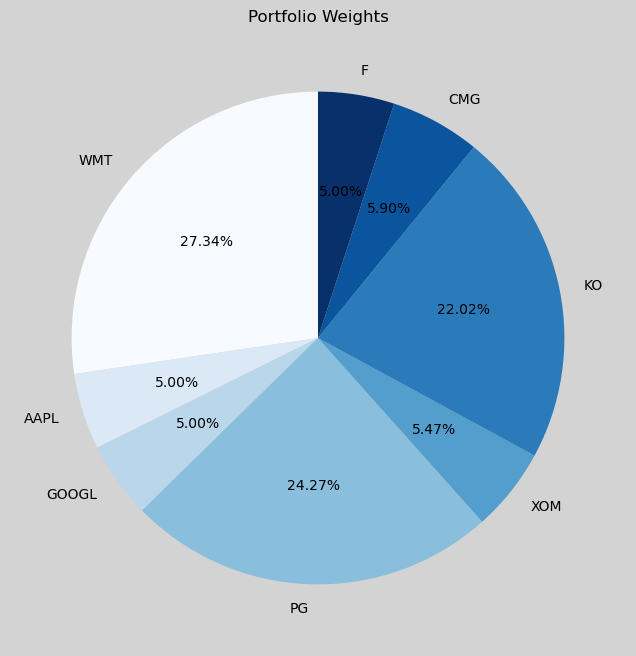

In [14]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
rf = 0.04413

min_var = vt.OptimizePortfolioWeights(returns, rf).opt_min_var()

vt.plot_weights(stocks, min_var)

## DynamicBacktesting

In [15]:
stocks=['WMT','AAPL','GOOGL','PG','XOM','KO','CMG','F']
start_date='2020-01-01'
end_date='2024-11-24'

data = vt.get_data(stocks, start_date, end_date)
returns = data.pct_change().dropna()
rf = 0.0035
pv = 1_000_000.0
months = 2

history = vt.DynamicBacktesting(price, benchmark_data, capital=1_000_000, rf=rf, months=months, alpha=0.95).simulation()
history

[*********************100%***********************]  8 of 8 completed


,Min Variance,Sharpe,Semivariance,Omega,Min CVaR,MCC
Date,,,,,,
2025-03-06,"1,000,000.0000","1,000,000.0000","1,000,000.0000","1,000,000.0000","1,000,000.0000","1,000,000.0000"
2025-03-07,"1,006,519.4258","1,005,813.9848","1,006,488.4457","988,712.7809","1,005,553.7388","1,002,932.1327"
2025-03-10,"992,400.1962","988,661.0313","990,226.8039","939,143.0053","988,542.3098","975,278.8836"
2025-03-11,"990,745.0371","982,350.2104","980,492.6930","954,733.0898","984,739.8164","978,221.6284"
2025-03-12,"990,505.2362","988,431.2109","983,717.7166","964,566.0689","990,118.5238","980,732.2680"
...,...,...,...,...,...,...
2025-12-23,"1,238,737.4063","1,323,349.0925","1,250,659.5709","1,307,292.5173","1,240,545.1976","1,353,680.9732"
2025-12-24,"1,243,494.5997","1,320,954.1138","1,253,921.6590","1,309,944.0446","1,246,163.4964","1,356,031.5561"
2025-12-26,"1,247,748.3442","1,331,191.2974","1,258,802.2497","1,316,049.8596","1,249,780.4087","1,359,610.6531"
